In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_excel('Dataset_Public.xlsx')

In [3]:
df.head()

,Claim Description,Coverage Code,Accident Source
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,AN,"Struck pedestrian, bicycle"
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,GB,Elevator/Escalator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",AB,Sideswipe or lane change
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,PA,Food Product
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,AD,Struck vehicle in rear


In [4]:
print(df['Coverage Code'].value_counts())

AD    50875
GB    33444
GD    26983
AP    23342
AB    14199
AL    10467
PA     8965
PB     5582
RB     5253
NS     2352
AU     1584
PM     1449
EL      906
AN      848
PL      739
GK      678
RC      656
PI      526
GO      403
AM      379
LL      282
DC      265
GL      250
EP      211
IK      184
OM      148
EO      143
PP      125
TE      124
IM       94
BM       74
BL       39
FB       33
CM       30
RF       17
OI       14
BR        8
RQ        6
EB        4
FF        3
LS        3
EI        2
PC        1
Name: Coverage Code, dtype: int64


In [5]:
print(df['Accident Source'].value_counts())

Alleged Negligent Act            21284
Sideswipe or lane change         19220
Struck vehicle in rear           10676
Not Otherwise Classified          8359
Struck animal or object           8195
                                 ...  
Aircraft                            17
VEHICLE                             16
Insured Lost Control                16
Natural Hazard-Vegetation           16
Boiler, pressure vessel, etc.       16
Name: Accident Source, Length: 312, dtype: int64


In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load dataset (replace with your actual dataset path)
df = pd.read_excel('Dataset_Public.xlsx')

# Trim the dataset to only the first 10,000 entries
df = df.head(10000)

# Save the trimmed dataset to a new Excel file
df.to_excel('Trimmed_Dataset.xlsx', index=False)
print("Trimmed dataset saved as 'Trimmed_Dataset.xlsx'.")

# Handle NaN values: Replace NaN with 'No description' or drop rows with NaN
df['Claim Description'] = df['Claim Description'].fillna('No description')

# Preprocess Claim Description (convert text to lowercase and clean)
df['Cleaned_Description'] = df['Claim Description'].str.lower()

# Vectorize text using TF-IDF (or you could use other methods like CountVectorizer, Word2Vec, etc.)
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X = vectorizer.fit_transform(df['Cleaned_Description'])

# Target columns: Coverage Code and Accident Source
y_coverage = df['Coverage Code']
y_accident = df['Accident Source']

# Split dataset into training and testing sets
X_train, X_test, y_coverage_train, y_coverage_test, y_accident_train, y_accident_test = train_test_split(
    X, y_coverage, y_accident, test_size=0.2, random_state=42)

# Check the distribution of the target classes
coverage_class_counts = y_coverage_train.value_counts()
accident_class_counts = y_accident_train.value_counts()

# Find the class with the minimum number of samples
min_samples_coverage = coverage_class_counts.min()
min_samples_accident = accident_class_counts.min()

print("Coverage Code distribution:")
print(coverage_class_counts)

print("Accident Source distribution:")
print(accident_class_counts)

# If any class has fewer samples than the number of neighbors in SMOTE, handle it

# Apply SMOTE to Coverage Code if there are enough samples
if min_samples_coverage > 2:  # Ensure there are enough samples to apply SMOTE
    smote_coverage = SMOTE(random_state=42, k_neighbors=2)
    X_resampled_coverage, y_resampled_coverage = smote_coverage.fit_resample(X_train, y_coverage_train)
    print("After SMOTE (Coverage Code):")
    print(pd.Series(y_resampled_coverage).value_counts())
else:
    # Use RandomOverSampler as an alternative to SMOTE if class size is too small
    ros_coverage = RandomOverSampler(random_state=42)
    X_resampled_coverage, y_resampled_coverage = ros_coverage.fit_resample(X_train, y_coverage_train)
    print("After RandomOverSampling (Coverage Code):")
    print(pd.Series(y_resampled_coverage).value_counts())

# Apply SMOTE to Accident Source if there are enough samples
if min_samples_accident > 2:  # Ensure there are enough samples to apply SMOTE
    smote_accident = SMOTE(random_state=42, k_neighbors=2)
    X_resampled_accident, y_resampled_accident = smote_accident.fit_resample(X_train, y_accident_train)
    print("After SMOTE (Accident Source):")
    print(pd.Series(y_resampled_accident).value_counts())
else:
    # Use RandomOverSampler as an alternative to SMOTE if class size is too small
    ros_accident = RandomOverSampler(random_state=42)
    X_resampled_accident, y_resampled_accident = ros_accident.fit_resample(X_train, y_accident_train)
    print("After RandomOverSampling (Accident Source):")
    print(pd.Series(y_resampled_accident).value_counts())

# Now you can proceed with training your model using the resampled data


Trimmed dataset saved as 'Trimmed_Dataset.xlsx'.
Coverage Code distribution:
AD    2090
GB    1428
GD    1138
AP     962
AB     595
AL     441
PA     357
PB     228
RB     207
NS      85
AU      69
PM      60
RC      44
AN      36
EL      36
GK      27
PL      25
PI      24
GO      18
IK      17
DC      17
GL      15
LL      15
AM      15
EP      12
EO      12
PP       5
IM       5
OM       4
BM       4
TE       3
CM       3
BL       2
FB       1
Name: Coverage Code, dtype: int64
Accident Source distribution:
Alleged Negligent Act            932
Sideswipe or lane change         794
Struck vehicle in rear           481
Struck parked vehicle            352
Not Otherwise Classified         352
                                ... 
Breach of Data Protection Act      1
Hit Object in Road                 1
Other                              1
Boiler, pressure vessel, etc.      1
Forklift accessory                 1
Name: Accident Source, Length: 275, dtype: int64
After RandomOverSampling (Cov

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm  # Import tqdm for progress bar

# Function to train a model and display progress
def train_and_predict(model, X_train, y_train, X_test, y_test, model_name):
    print(f"Training {model_name} model...")
    # Train the model
    model.fit(X_train, y_train)
    
    print(f"Predicting on test data for {model_name}...")
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    return model, y_pred

# Use tqdm to show progress bar during training and prediction
with tqdm(total=2, desc="Training models", unit="model") as pbar:
    # Train and predict for Coverage Code model
    coverage_model = RandomForestClassifier(random_state=42)
    coverage_model, y_coverage_pred = train_and_predict(coverage_model, X_resampled_coverage, y_resampled_coverage, X_test, y_coverage_test, "Coverage Code")
    pbar.update(1)  # Update progress bar after the first model is trained and predicted
    
    # Train and predict for Accident Source model
    accident_model = RandomForestClassifier(random_state=42)
    accident_model, y_accident_pred = train_and_predict(accident_model, X_resampled_accident, y_resampled_accident, X_test, y_accident_test, "Accident Source")
    pbar.update(1)  # Update progress bar after the second model is trained and predicted

# After training both models, you can save the predictions as well if needed
print("Models training complete.")


Training models:   0%|          | 0/2 [00:00<?, ?model/s]

Training Coverage Code model...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

Predicting on test data for Coverage Code...
Coverage Code Classification Report:
              precision    recall  f1-score   support

          AB       0.43      0.19      0.26       175
          AD       0.57      0.78      0.66       521
          AL       0.86      0.90      0.88       102
          AM       0.00      0.00      0.00         5
          AN       0.00      0.00      0.00         8
          AP       0.63      0.30      0.40       256
          AU       0.22      0.25      0.24        16
          DC       0.50      0.33      0.40         3
          EL       0.00      0.00      0.00         8
          EO       0.00      0.00      0.00         2
          EP       0.33      1.00      0.50         1
          FB       0.00      0.00      0.00         2
          GB       0.60      0.86      0.70       337
          GD       0.61      0.64      0.63       278
          GK       0.00      0.00      0.00         2
          GL       0.00      0.00      0.00         4

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

Accident Source Classification Report:
                                            precision    recall  f1-score   support

    Accidental disposal of property/object       0.00      0.00      0.00         7
                   Administrative Decision       0.00      0.00      0.00         4
                    Alleged Discrimination       0.00      0.00      0.00         1
      Alleged Misconduct - Personal Injury       0.25      1.00      0.40         1
                     Alleged Negligent Act       0.27      0.59      0.37       213
         Alleged contamination or spoilage       0.26      0.29      0.28        17
      Alleged damage to property of others       0.33      0.12      0.17        26
               Alleged design flaw, defect       0.44      0.24      0.31        17
         Alleged foreign object in product       0.45      0.56      0.50        27
              Alleged improper formulation       0.00      0.00      0.00         1
  Alleged improper maintenance - mun

In [22]:
import joblib

# Save the trained RandomForest models
joblib.dump(coverage_model, 'coverage_model.pkl')
joblib.dump(accident_model, 'accident_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Models and vectorizer saved successfully!")


Models and vectorizer saved successfully!


In [23]:
# Load the trained RandomForest models and vectorizer
coverage_model = joblib.load('coverage_model.pkl')
accident_model = joblib.load('accident_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Make predictions on the test data
y_coverage_pred = coverage_model.predict(X_test)
y_accident_pred = accident_model.predict(X_test)

# Evaluate the models using classification report
print("Coverage Code Classification Report:")
print(classification_report(y_coverage_test, y_coverage_pred))

print("Accident Source Classification Report:")
print(classification_report(y_accident_test, y_accident_pred))

# Print accuracy scores for both models
coverage_accuracy = accuracy_score(y_coverage_test, y_coverage_pred)
accident_accuracy = accuracy_score(y_accident_test, y_accident_pred)

print(f"Coverage Code Model Accuracy: {coverage_accuracy:.4f}")
print(f"Accident Source Model Accuracy: {accident_accuracy:.4f}")


Coverage Code Classification Report:
              precision    recall  f1-score   support

          AB       0.43      0.19      0.26       175
          AD       0.57      0.78      0.66       521
          AL       0.86      0.90      0.88       102
          AM       0.00      0.00      0.00         5
          AN       0.00      0.00      0.00         8
          AP       0.63      0.30      0.40       256
          AU       0.22      0.25      0.24        16
          DC       0.50      0.33      0.40         3
          EL       0.00      0.00      0.00         8
          EO       0.00      0.00      0.00         2
          EP       0.33      1.00      0.50         1
          FB       0.00      0.00      0.00         2
          GB       0.60      0.86      0.70       337
          GD       0.61      0.64      0.63       278
          GK       0.00      0.00      0.00         2
          GL       0.00      0.00      0.00         4
          GO       0.25      0.25      0.25 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

                                            precision    recall  f1-score   support

    Accidental disposal of property/object       0.00      0.00      0.00         7
                   Administrative Decision       0.00      0.00      0.00         4
                    Alleged Discrimination       0.00      0.00      0.00         1
      Alleged Misconduct - Personal Injury       0.25      1.00      0.40         1
                     Alleged Negligent Act       0.27      0.59      0.37       213
         Alleged contamination or spoilage       0.26      0.29      0.28        17
      Alleged damage to property of others       0.33      0.12      0.17        26
               Alleged design flaw, defect       0.44      0.24      0.31        17
         Alleged foreign object in product       0.45      0.56      0.50        27
              Alleged improper formulation       0.00      0.00      0.00         1
  Alleged improper maintenance - municipal       0.50      0.50      0.50  

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Predict using the loaded models
y_coverage_pred = coverage_model.predict(X_test)
y_accident_pred = accident_model.predict(X_test)

# Classification Report
print("Coverage Code Classification Report:")
print(classification_report(y_coverage_test, y_coverage_pred))

print("Accident Source Classification Report:")
print(classification_report(y_accident_test, y_accident_pred))


Coverage Code Classification Report:
              precision    recall  f1-score   support

          AB       0.43      0.19      0.26       175
          AD       0.57      0.78      0.66       521
          AL       0.86      0.90      0.88       102
          AM       0.00      0.00      0.00         5
          AN       0.00      0.00      0.00         8
          AP       0.63      0.30      0.40       256
          AU       0.22      0.25      0.24        16
          DC       0.50      0.33      0.40         3
          EL       0.00      0.00      0.00         8
          EO       0.00      0.00      0.00         2
          EP       0.33      1.00      0.50         1
          FB       0.00      0.00      0.00         2
          GB       0.60      0.86      0.70       337
          GD       0.61      0.64      0.63       278
          GK       0.00      0.00      0.00         2
          GL       0.00      0.00      0.00         4
          GO       0.25      0.25      0.25 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

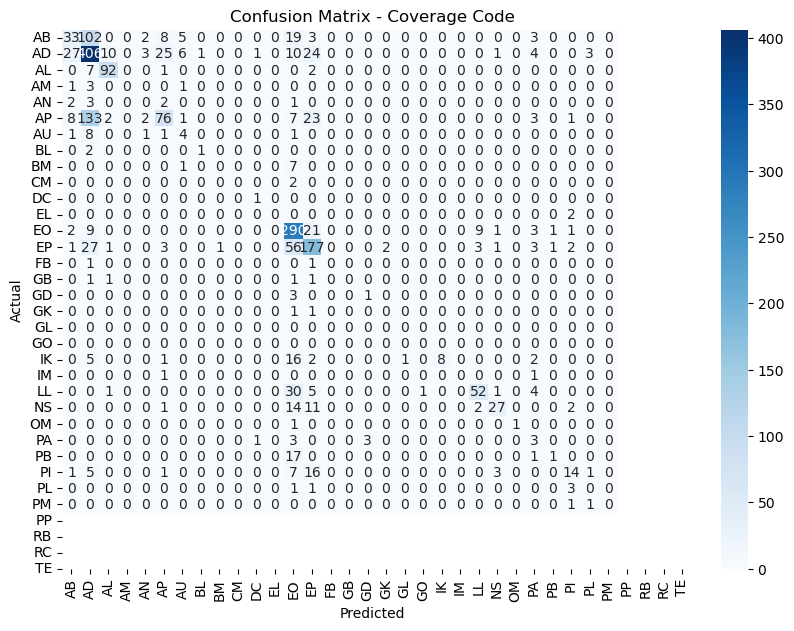

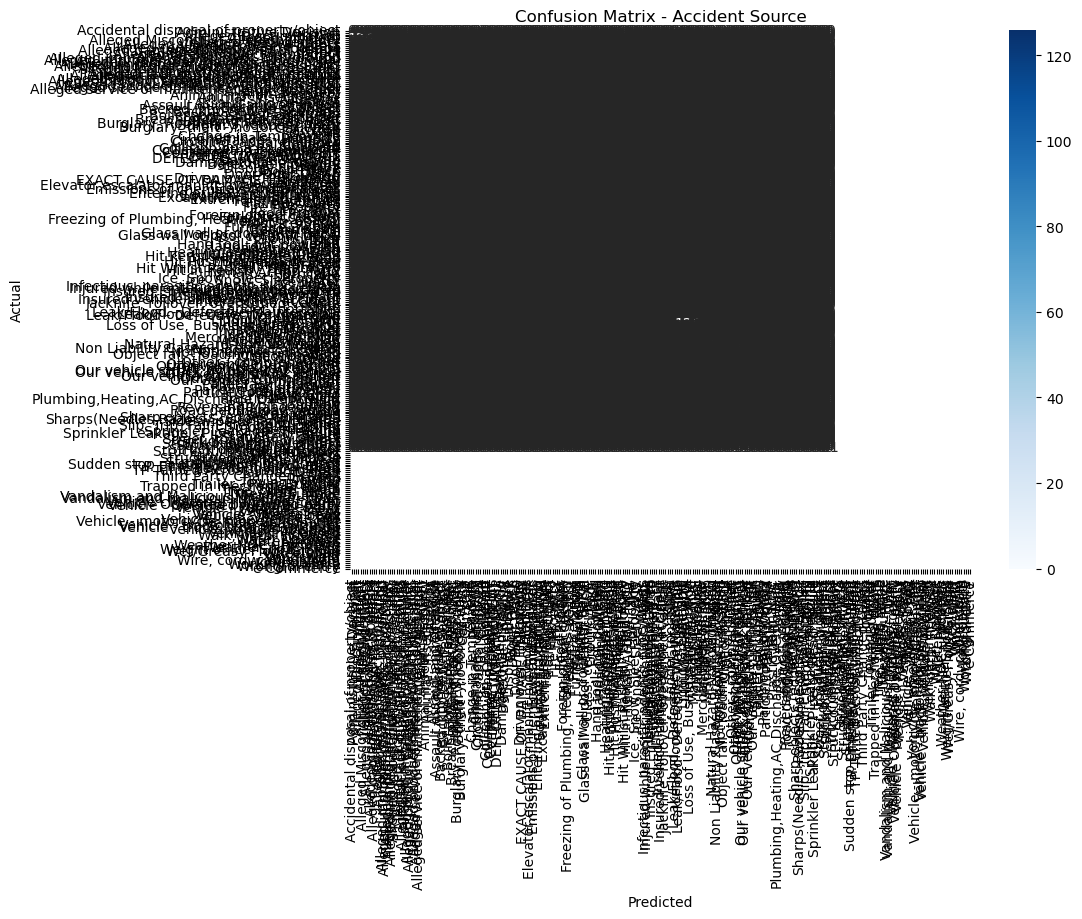

In [25]:
# Confusion Matrix for Coverage Code
conf_matrix_coverage = confusion_matrix(y_coverage_test, y_coverage_pred)

# Confusion Matrix for Accident Source
conf_matrix_accident = confusion_matrix(y_accident_test, y_accident_pred)

# Plot Confusion Matrix for Coverage Code
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_coverage, annot=True, fmt='d', cmap='Blues', xticklabels=coverage_model.classes_, yticklabels=coverage_model.classes_)
plt.title('Confusion Matrix - Coverage Code')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Accident Source
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_accident, annot=True, fmt='d', cmap='Blues', xticklabels=accident_model.classes_, yticklabels=accident_model.classes_)
plt.title('Confusion Matrix - Accident Source')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ran

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ran

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_ran

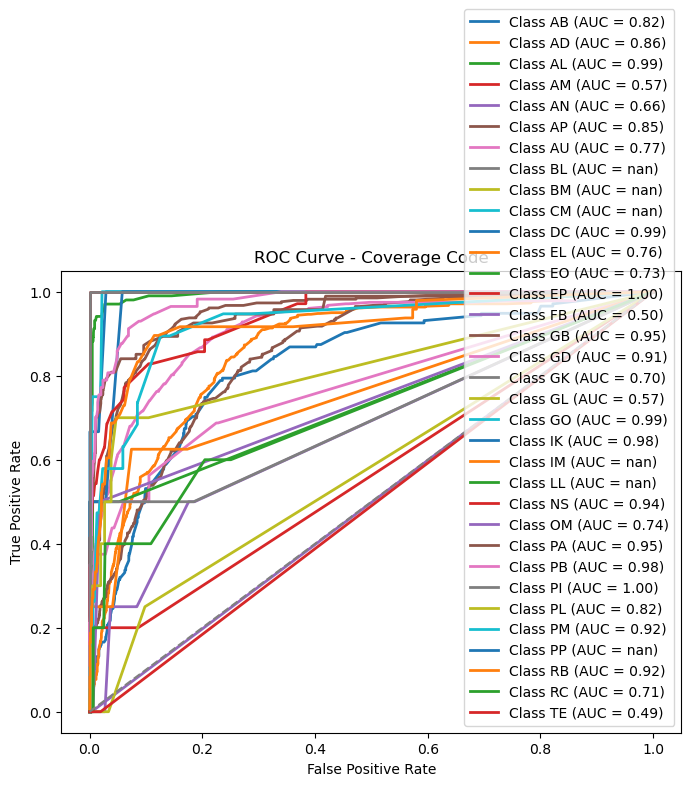

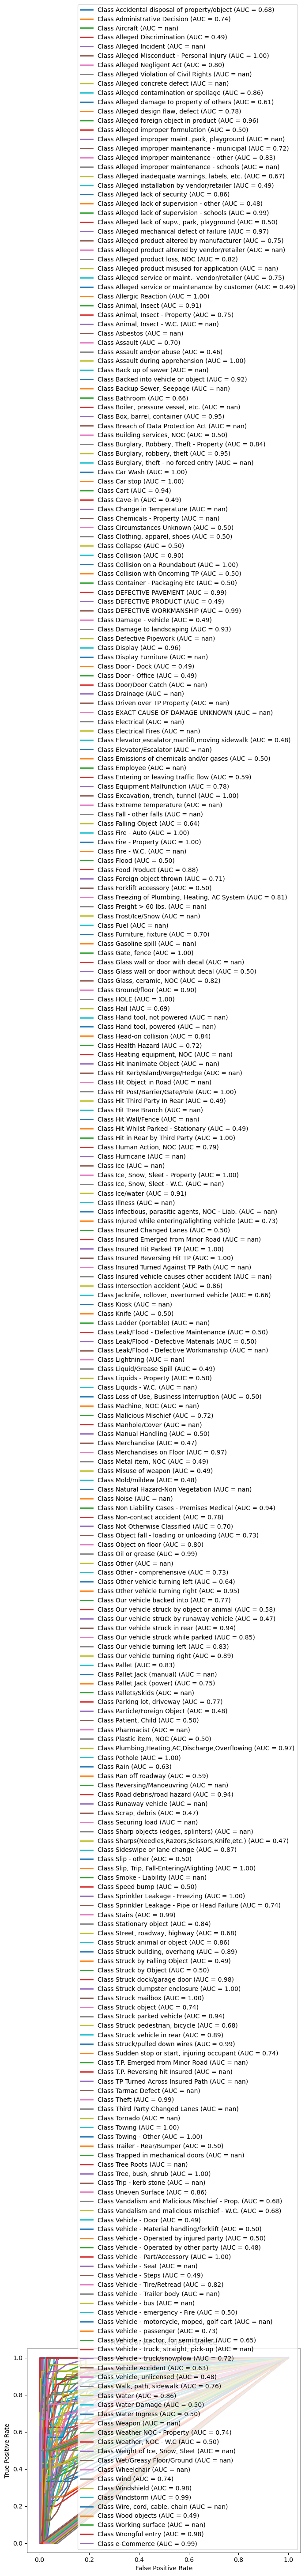

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the true labels for multi-class ROC computation
y_coverage_test_bin = label_binarize(y_coverage_test, classes=coverage_model.classes_)
y_accident_test_bin = label_binarize(y_accident_test, classes=accident_model.classes_)

# Compute ROC curve for Coverage Code (one-vs-rest)
fpr_coverage, tpr_coverage, roc_auc_coverage = {}, {}, {}
for i in range(y_coverage_test_bin.shape[1]):
    fpr_coverage[i], tpr_coverage[i], _ = roc_curve(y_coverage_test_bin[:, i], coverage_model.predict_proba(X_test)[:, i])
    roc_auc_coverage[i] = auc(fpr_coverage[i], tpr_coverage[i])

# Compute ROC curve for Accident Source (one-vs-rest)
fpr_accident, tpr_accident, roc_auc_accident = {}, {}, {}
for i in range(y_accident_test_bin.shape[1]):
    fpr_accident[i], tpr_accident[i], _ = roc_curve(y_accident_test_bin[:, i], accident_model.predict_proba(X_test)[:, i])
    roc_auc_accident[i] = auc(fpr_accident[i], tpr_accident[i])

# Plot ROC curves for each class (Coverage Code)
plt.figure(figsize=(8, 6))
for i in range(len(roc_auc_coverage)):
    plt.plot(fpr_coverage[i], tpr_coverage[i], lw=2, label=f'Class {coverage_model.classes_[i]} (AUC = {roc_auc_coverage[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Coverage Code')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curves for each class (Accident Source)
plt.figure(figsize=(8, 6))
for i in range(len(roc_auc_accident)):
    plt.plot(fpr_accident[i], tpr_accident[i], lw=2, label=f'Class {accident_model.classes_[i]} (AUC = {roc_auc_accident[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Accident Source')
plt.legend(loc='lower right')
plt.show()


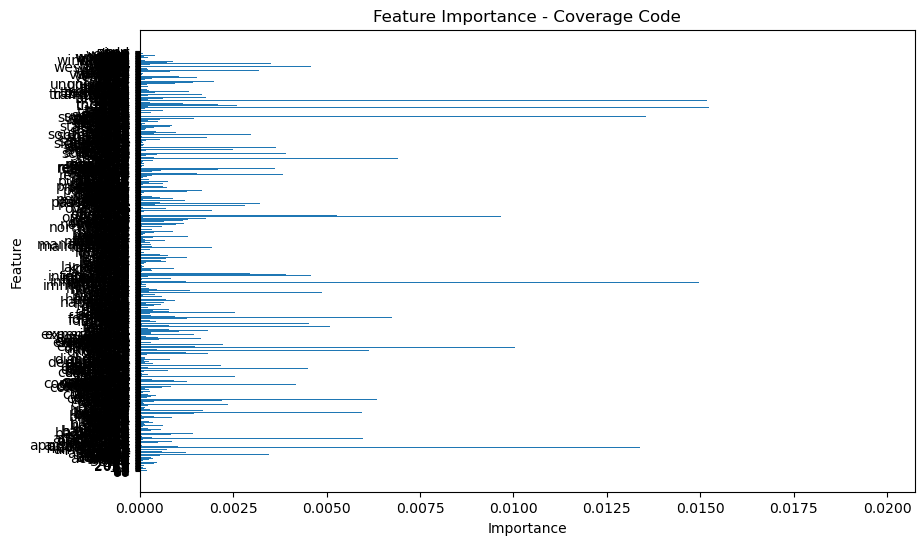

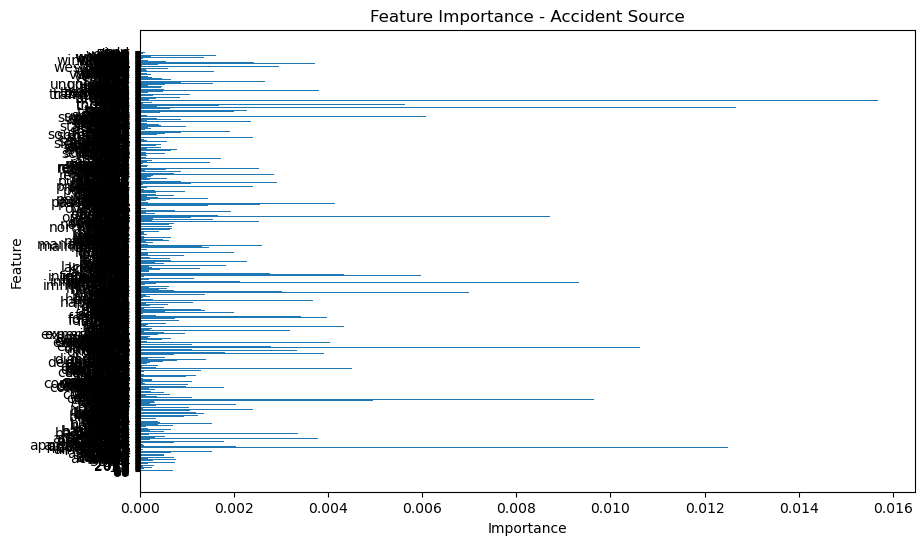

In [28]:
# Feature Importance for Coverage Code
plt.figure(figsize=(10, 6))
plt.barh(vectorizer.get_feature_names_out(), coverage_model.feature_importances_)
plt.title('Feature Importance - Coverage Code')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature Importance for Accident Source
plt.figure(figsize=(10, 6))
plt.barh(vectorizer.get_feature_names_out(), accident_model.feature_importances_)
plt.title('Feature Importance - Accident Source')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
